In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [3]:
#get files
# Read in the GeoPackage file for 2009
file_path_2009 = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\FINAL_LAYERS\2009_digitized_pools1_Georectified_withU1.gpkg"
gdf_2009 = gpd.read_file(file_path_2009)

# Read in the GeoPackage file for 2021
file_path_2021 = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\FINAL_LAYERS\2021_FinalPools_withU1.gpkg"
gdf_2021 = gpd.read_file(file_path_2021)
gdf_2021

# File with marsh areas
file_path = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\spreadsheets\Marsh_areas.xlsx"
# Read in the Excel file and assign it to marsh_areas variable
marsh_areas = pd.read_excel(file_path)

In [4]:
#add marsh number column
gdf_2021['marsh_number']=gdf_2021['ID'].str.extract(r'(\d+)')
gdf_2009['marsh_number']=gdf_2009['ID'].str.extract(r'(\d+)')
gdf_2009['marsh_number'].unique()

array(['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

In [5]:
len(gdf_2021)

14156

In [6]:
# sum of pool types by marsh 2021
# Group by marsh_number and PoolType, summing the areas
grouped_df = gdf_2021.groupby(['marsh_number', 'PoolType'])['area'].sum().reset_index()
# Pivot the grouped DataFrame to create a new table
PercentCover21_table = grouped_df.pivot(index='marsh_number', columns='PoolType', values='area').fillna(0)
# Add a new column to PercentCover21_table summing the areas of IP, MS, and PP pools
PercentCover21_table['Total_Area'] = PercentCover21_table.sum(axis=1)
# Reset the index to convert 'marsh_number' from index to a column
PercentCover21_table.reset_index(inplace=True)
# Convert marsh_number to integer type (if needed)
PercentCover21_table['marsh_number'] = PercentCover21_table['marsh_number'].astype(int)
# Display the resulting pivot table with marsh_number as a column
print(PercentCover21_table)

PoolType  marsh_number             IP            MS            PP  \
0                    1  255055.798229  1.606693e+06  28163.478192   
1                   10   12016.195100  1.923363e+05    506.078434   
2                   11    7101.578586  1.034991e+05   2225.090945   
3                   12    3476.068315  4.707946e+04      0.000000   
4                    2   93476.808742  6.267281e+05   7556.875953   
5                    3   36635.490911  2.637274e+05   2514.631287   
6                    4   21308.067823  2.430076e+05   9574.619031   
7                    5    1889.104086  2.304050e+05    271.883284   
8                    6   19062.944060  2.582899e+05    489.225138   
9                    7    7169.641730  1.082159e+05    189.059054   
10                   8    7442.216459  6.407630e+04      0.000000   
11                   9    4126.626822  6.908831e+04   2005.814766   

PoolType    Total_Area  
0         1.889912e+06  
1         2.048585e+05  
2         1.128257e+05  
3 

In [7]:
#add marsh areas to 21
# Convert marsh_number to integer in PercentCover21_table
PercentCover21_table['marsh_number'] = PercentCover21_table['marsh_number'].astype(int)
# Reset index of PercentCover21_table
PercentCover21_table.reset_index(inplace=True)

# Merge PercentCover21_table with marsh_areas based on marsh_number
merged_PercCovtable21 = pd.merge(PercentCover21_table, marsh_areas, on='marsh_number', how='left')

# Display the resulting merged DataFrame
print(merged_PercCovtable21)

    index  marsh_number             IP            MS            PP  \
0       0             1  255055.798229  1.606693e+06  28163.478192   
1       1            10   12016.195100  1.923363e+05    506.078434   
2       2            11    7101.578586  1.034991e+05   2225.090945   
3       3            12    3476.068315  4.707946e+04      0.000000   
4       4             2   93476.808742  6.267281e+05   7556.875953   
5       5             3   36635.490911  2.637274e+05   2514.631287   
6       6             4   21308.067823  2.430076e+05   9574.619031   
7       7             5    1889.104086  2.304050e+05    271.883284   
8       8             6   19062.944060  2.582899e+05    489.225138   
9       9             7    7169.641730  1.082159e+05    189.059054   
10     10             8    7442.216459  6.407630e+04      0.000000   
11     11             9    4126.626822  6.908831e+04   2005.814766   

      Total_Area    marsh_area          marsh_name  
0   1.889912e+06  1.007937e+07     S

In [8]:
# Calculate percent cover for MS, IP, PP, and Total 21
merged_PercCovtable21['MS_PercentCover'] = (merged_PercCovtable21['MS'] / merged_PercCovtable21['marsh_area']) * 100
merged_PercCovtable21['IP_PercentCover'] = (merged_PercCovtable21['IP'] / merged_PercCovtable21['marsh_area']) * 100
merged_PercCovtable21['PP_PercentCover'] = (merged_PercCovtable21['PP'] / merged_PercCovtable21['marsh_area']) * 100
merged_PercCovtable21['Total_PercentCover'] = (merged_PercCovtable21['Total_Area'] / merged_PercCovtable21['marsh_area']) * 100

# Display the updated DataFrame with percent cover columns
print(merged_PercCovtable21)

    index  marsh_number             IP            MS            PP  \
0       0             1  255055.798229  1.606693e+06  28163.478192   
1       1            10   12016.195100  1.923363e+05    506.078434   
2       2            11    7101.578586  1.034991e+05   2225.090945   
3       3            12    3476.068315  4.707946e+04      0.000000   
4       4             2   93476.808742  6.267281e+05   7556.875953   
5       5             3   36635.490911  2.637274e+05   2514.631287   
6       6             4   21308.067823  2.430076e+05   9574.619031   
7       7             5    1889.104086  2.304050e+05    271.883284   
8       8             6   19062.944060  2.582899e+05    489.225138   
9       9             7    7169.641730  1.082159e+05    189.059054   
10     10             8    7442.216459  6.407630e+04      0.000000   
11     11             9    4126.626822  6.908831e+04   2005.814766   

      Total_Area    marsh_area          marsh_name  MS_PercentCover  \
0   1.889912e+06  

In [9]:
# sum of pool types by marsh 2009
# Group by marsh_number and PoolType, summing the areas
grouped_df = gdf_2009.groupby(['marsh_number', 'PoolType'])['area'].sum().reset_index()
# Pivot the grouped DataFrame to create a new table
PercentCover09_table = grouped_df.pivot(index='marsh_number', columns='PoolType', values='area').fillna(0)
# Add a new column to PercentCover09_table summing the areas of IP, MS, and PP pools
PercentCover09_table['Total_Area'] = PercentCover09_table.sum(axis=1)
# Reset the index to convert 'marsh_number' from index to a column
PercentCover09_table.reset_index(inplace=True)
# Convert marsh_number to integer type (if needed)
PercentCover09_table['marsh_number'] = PercentCover09_table['marsh_number'].astype(int)
# Display the resulting pivot table with marsh_number as a column
print(PercentCover09_table)

PoolType  marsh_number             IP            MS            PP  \
0                    1  219088.053387  1.371749e+06  24633.819650   
1                   10   12161.442183  1.737608e+05    724.344022   
2                   11    7330.290854  6.057566e+04    718.133691   
3                   12    3714.150485  3.738953e+04      0.000000   
4                    2  108702.960291  5.748820e+05   5620.324030   
5                    3   42106.569293  2.203960e+05   3340.132626   
6                    4   25121.808487  2.154994e+05  10124.669515   
7                    5    3271.482417  1.972002e+05    611.229232   
8                    6   22386.489378  1.956975e+05   2250.532608   
9                    7    6932.612670  8.471940e+04      0.000000   
10                   8    6974.243889  4.719038e+04      0.000000   
11                   9    3604.011630  5.817798e+04   1526.360299   

PoolType    Total_Area  
0         1.615471e+06  
1         1.866466e+05  
2         6.862409e+04  
3 

In [10]:
#add marsh areas to 09
# Convert marsh_number to integer in PercentCover09_table
PercentCover09_table['marsh_number'] = PercentCover09_table['marsh_number'].astype(int)
# Reset index of PercentCover09_table
PercentCover09_table.reset_index(inplace=True)

# Merge PercentCover09_table with marsh_areas based on marsh_number
merged_PercCovtable09 = pd.merge(PercentCover09_table, marsh_areas, on='marsh_number', how='left')

# Display the resulting merged DataFrame
print(merged_PercCovtable09)

    index  marsh_number             IP            MS            PP  \
0       0             1  219088.053387  1.371749e+06  24633.819650   
1       1            10   12161.442183  1.737608e+05    724.344022   
2       2            11    7330.290854  6.057566e+04    718.133691   
3       3            12    3714.150485  3.738953e+04      0.000000   
4       4             2  108702.960291  5.748820e+05   5620.324030   
5       5             3   42106.569293  2.203960e+05   3340.132626   
6       6             4   25121.808487  2.154994e+05  10124.669515   
7       7             5    3271.482417  1.972002e+05    611.229232   
8       8             6   22386.489378  1.956975e+05   2250.532608   
9       9             7    6932.612670  8.471940e+04      0.000000   
10     10             8    6974.243889  4.719038e+04      0.000000   
11     11             9    3604.011630  5.817798e+04   1526.360299   

      Total_Area    marsh_area          marsh_name  
0   1.615471e+06  1.007937e+07     S

In [11]:
# Calculate percent cover for MS, IP, PP, and Total 09
merged_PercCovtable09['MS_PercentCover'] = (merged_PercCovtable09['MS'] / merged_PercCovtable09['marsh_area']) * 100
merged_PercCovtable09['IP_PercentCover'] = (merged_PercCovtable09['IP'] / merged_PercCovtable09['marsh_area']) * 100
merged_PercCovtable09['PP_PercentCover'] = (merged_PercCovtable09['PP'] / merged_PercCovtable09['marsh_area']) * 100
merged_PercCovtable09['Total_PercentCover'] = (merged_PercCovtable09['Total_Area'] / merged_PercCovtable09['marsh_area']) * 100

# Display the updated DataFrame with percent cover columns
print(merged_PercCovtable09)

    index  marsh_number             IP            MS            PP  \
0       0             1  219088.053387  1.371749e+06  24633.819650   
1       1            10   12161.442183  1.737608e+05    724.344022   
2       2            11    7330.290854  6.057566e+04    718.133691   
3       3            12    3714.150485  3.738953e+04      0.000000   
4       4             2  108702.960291  5.748820e+05   5620.324030   
5       5             3   42106.569293  2.203960e+05   3340.132626   
6       6             4   25121.808487  2.154994e+05  10124.669515   
7       7             5    3271.482417  1.972002e+05    611.229232   
8       8             6   22386.489378  1.956975e+05   2250.532608   
9       9             7    6932.612670  8.471940e+04      0.000000   
10     10             8    6974.243889  4.719038e+04      0.000000   
11     11             9    3604.011630  5.817798e+04   1526.360299   

      Total_Area    marsh_area          marsh_name  MS_PercentCover  \
0   1.615471e+06  

In [12]:
# Merge based on 'marsh_number'
merged_combined_perc_cov = pd.merge(merged_PercCovtable09, merged_PercCovtable21, on='marsh_number', suffixes=('_09', '_21'), how='outer')

# Display the resulting merged DataFrame
print(merged_combined_perc_cov)

    index_09  marsh_number          IP_09         MS_09         PP_09  \
0          0             1  219088.053387  1.371749e+06  24633.819650   
1          1            10   12161.442183  1.737608e+05    724.344022   
2          2            11    7330.290854  6.057566e+04    718.133691   
3          3            12    3714.150485  3.738953e+04      0.000000   
4          4             2  108702.960291  5.748820e+05   5620.324030   
5          5             3   42106.569293  2.203960e+05   3340.132626   
6          6             4   25121.808487  2.154994e+05  10124.669515   
7          7             5    3271.482417  1.972002e+05    611.229232   
8          8             6   22386.489378  1.956975e+05   2250.532608   
9          9             7    6932.612670  8.471940e+04      0.000000   
10        10             8    6974.243889  4.719038e+04      0.000000   
11        11             9    3604.011630  5.817798e+04   1526.360299   

    Total_Area_09  marsh_area_09       marsh_name_

In [13]:
# Delete last 4 characters of 'marsh_name_21' column
merged_combined_perc_cov['marsh_name_21'] = merged_combined_perc_cov['marsh_name_21'].str[:-4]
# Delete last 4 characters of 'marsh_name_09' column
#merged_combined_perc_cov['marsh_name_09'] = merged_combined_perc_cov['marsh_name_09'].str[:-4]

# Display the updated DataFrame with modified 'marsh_name_21' column
print(merged_combined_perc_cov)

    index_09  marsh_number          IP_09         MS_09         PP_09  \
0          0             1  219088.053387  1.371749e+06  24633.819650   
1          1            10   12161.442183  1.737608e+05    724.344022   
2          2            11    7330.290854  6.057566e+04    718.133691   
3          3            12    3714.150485  3.738953e+04      0.000000   
4          4             2  108702.960291  5.748820e+05   5620.324030   
5          5             3   42106.569293  2.203960e+05   3340.132626   
6          6             4   25121.808487  2.154994e+05  10124.669515   
7          7             5    3271.482417  1.972002e+05    611.229232   
8          8             6   22386.489378  1.956975e+05   2250.532608   
9          9             7    6932.612670  8.471940e+04      0.000000   
10        10             8    6974.243889  4.719038e+04      0.000000   
11        11             9    3604.011630  5.817798e+04   1526.360299   

    Total_Area_09  marsh_area_09       marsh_name_

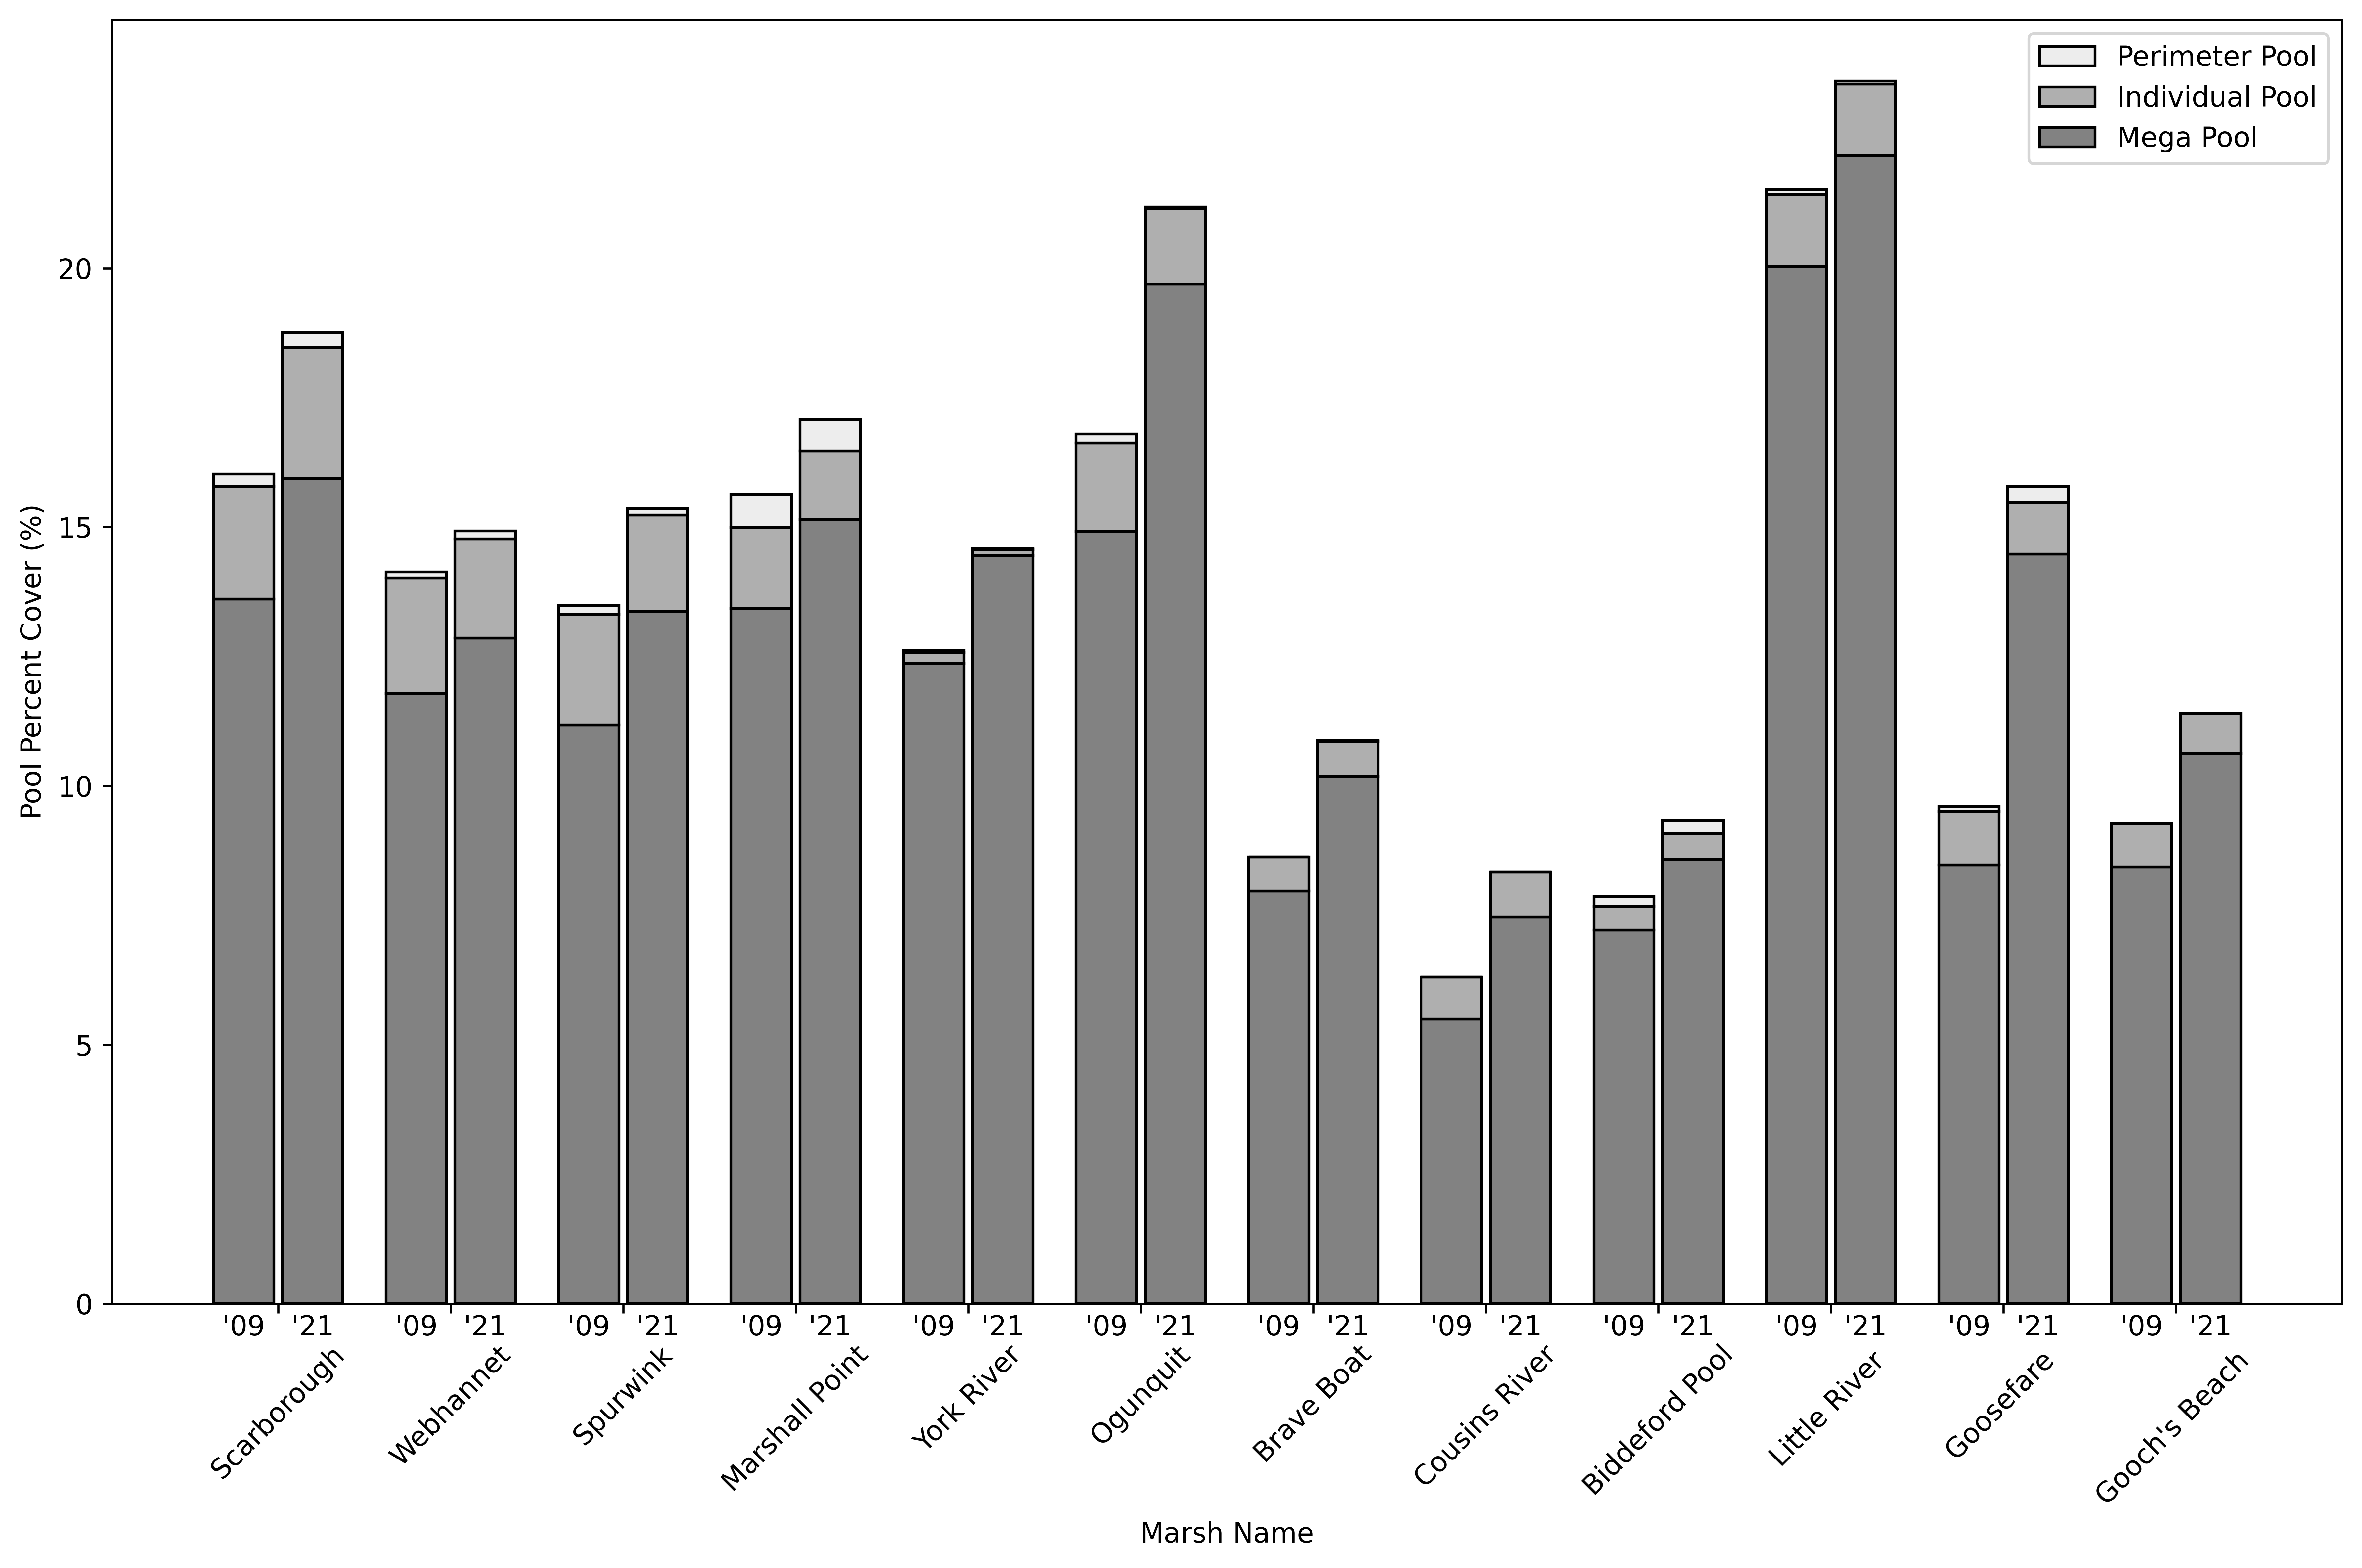

In [14]:
# THIS GRAPH MAKES POOL EXPANSION FOR PAPER
# Sort the DataFrame by marsh_number
merged_combined_perc_cov_sorted = merged_combined_perc_cov.sort_values(by='marsh_number')

# Extracting data for plotting
marsh_names = merged_combined_perc_cov_sorted['marsh_name_21']
percent_cover_ip_2009 = merged_combined_perc_cov_sorted['IP_PercentCover_09']
percent_cover_ms_2009 = merged_combined_perc_cov_sorted['MS_PercentCover_09']
percent_cover_pp_2009 = merged_combined_perc_cov_sorted['PP_PercentCover_09']
percent_cover_ip_2021 = merged_combined_perc_cov_sorted['IP_PercentCover_21']
percent_cover_ms_2021 = merged_combined_perc_cov_sorted['MS_PercentCover_21']
percent_cover_pp_2021 = merged_combined_perc_cov_sorted['PP_PercentCover_21']

# Set the width of each bar and the gap between bars
width = 0.35
bar_gap = 0.05

# Calculate the x-axis positions for bars
x = np.arange(len(marsh_names))

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=600)  # Adjust DPI as needed

# Plotting bars for 2009 data
p1 = ax.bar(x - width/2 - bar_gap/2, percent_cover_ms_2009, width, label='MS (2009)', color='#828282', edgecolor='black')
p2 = ax.bar(x - width/2 - bar_gap/2, percent_cover_ip_2009, width, bottom=percent_cover_ms_2009, label='IP (2009)', color='#afafaf', edgecolor='black')
p3 = ax.bar(x - width/2 - bar_gap/2, percent_cover_pp_2009, width, bottom=percent_cover_ms_2009 + percent_cover_ip_2009, label='PP (2009)', color='#ededed', edgecolor='black')

# Plotting bars for 2021 data
p4 = ax.bar(x + width/2 + bar_gap/2, percent_cover_ms_2021, width, color='#828282', edgecolor='black')
p5 = ax.bar(x + width/2 + bar_gap/2, percent_cover_ip_2021, width, bottom=percent_cover_ms_2021, color='#afafaf', edgecolor='black')
p6 = ax.bar(x + width/2 + bar_gap/2, percent_cover_pp_2021, width, bottom=percent_cover_ms_2021 + percent_cover_ip_2021, color='#ededed', edgecolor='black')

# Add labels for years below each bar
for i, (bar2009, bar2021) in enumerate(zip(p3, p6)):
    ax.text(bar2009.get_x() + bar2009.get_width() / 2, -0.2, "'09", ha='center', va='top', fontsize=10)
    ax.text(bar2021.get_x() + bar2021.get_width() / 2, -0.2, "'21", ha='center', va='top', fontsize=10)

# Create custom legend handles and labels (show only '09' labels)
legend_handles = [p3[0], p2[0], p1[0]]
legend_labels = ['Perimeter Pool', 'Individual Pool', 'Mega Pool']

# Set labels, title, and custom legend
ax.set_xlabel('Marsh Name')
ax.set_ylabel('Pool Percent Cover (%)')
ax.set_xticks(x)
ax.set_xticklabels(marsh_names, rotation=45, ha='center', va='top')
plt.tick_params(axis='x', which='major', pad=10)
ax.legend(legend_handles, legend_labels)

# Show the plot
plt.tight_layout()


# Specify the file path where you want to save the figure
file_path = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Manuscript\Figures_final\poolexpansion\PoolExpansionGraph.png"

# Save the plot to the specified file path
plt.savefig(file_path, dpi=600)  # Save the plot with high DPI (dots per inch)

plt.show()

In [15]:
#percent change of pool cover on marshes
# Select columns 'marsh_name_09', 'Total_Area_09', and 'Total_Area_21' from the DataFrame
selected_columns = ['marsh_name_21', 'Total_Area_09', 'Total_Area_21', 'marsh_number','Total_PercentCover_21', 'Total_PercentCover_09' ]

# Create a new DataFrame with the selected columns
new_df = merged_combined_perc_cov[selected_columns]

# Convert the DataFrame to a GeoDataFrame
new_gdf = gpd.GeoDataFrame(new_df)

# Display the new GeoDataFrame
print(new_gdf)

     marsh_name_21  Total_Area_09  Total_Area_21  marsh_number  \
0      Scarborough   1.615471e+06   1.889912e+06             1   
1    Little River    1.866466e+05   2.048585e+05            10   
2       Goosefare    6.862409e+04   1.128257e+05            11   
3   Gooch's Beach    4.110368e+04   5.055553e+04            12   
4        Webhannet   6.892053e+05   7.277618e+05             2   
5         Spurwink   2.658427e+05   3.028775e+05             3   
6   Marshall Point   2.507459e+05   2.738903e+05             4   
7       York River   2.010829e+05   2.325660e+05             5   
8         Ogunquit   2.203345e+05   2.778420e+05             6   
9       Brave Boat   9.165201e+04   1.155746e+05             7   
10   Cousins River   5.416462e+04   7.151852e+04             8   
11  Biddeford Pool   6.330835e+04   7.522075e+04             9   

    Total_PercentCover_21  Total_PercentCover_09  
0               18.750304              16.027504  
1               23.615617              

In [16]:

# Assuming new_gdf is a regular DataFrame (not GeoDataFrame)
# Calculate percent change and assign it to the new column 'Percent Change'
new_gdf['Percent Change'] = ((new_gdf['Total_Area_21'] - new_gdf['Total_Area_09']) / new_gdf['Total_Area_09']) * 100

# Define the output CSV file path
output_csv_path = r"D:\Users\Classroom\Desktop\Katie summer 2023\Salt_marsh_digitization\Elevation_analysis\output_file.csv"

# Write the updated DataFrame to a CSV file
new_gdf.to_csv(output_csv_path, index=False)

# Display the updated DataFrame (optional)
print(new_gdf)

     marsh_name_21  Total_Area_09  Total_Area_21  marsh_number  \
0      Scarborough   1.615471e+06   1.889912e+06             1   
1    Little River    1.866466e+05   2.048585e+05            10   
2       Goosefare    6.862409e+04   1.128257e+05            11   
3   Gooch's Beach    4.110368e+04   5.055553e+04            12   
4        Webhannet   6.892053e+05   7.277618e+05             2   
5         Spurwink   2.658427e+05   3.028775e+05             3   
6   Marshall Point   2.507459e+05   2.738903e+05             4   
7       York River   2.010829e+05   2.325660e+05             5   
8         Ogunquit   2.203345e+05   2.778420e+05             6   
9       Brave Boat   9.165201e+04   1.155746e+05             7   
10   Cousins River   5.416462e+04   7.151852e+04             8   
11  Biddeford Pool   6.330835e+04   7.522075e+04             9   

    Total_PercentCover_21  Total_PercentCover_09  Percent Change  
0               18.750304              16.027504       16.988303  
1      

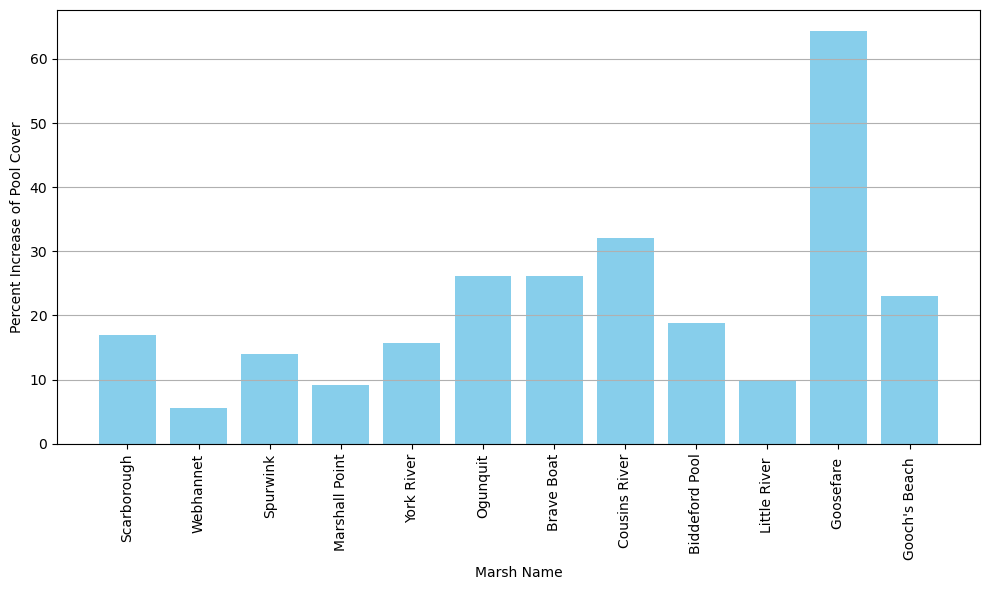

In [17]:
# Sort the DataFrame by 'marsh_number'
new_gdf_sorted = new_gdf.sort_values(by='marsh_number')

plt.figure(figsize=(10, 6))
plt.bar(new_gdf_sorted['marsh_name_21'], new_gdf_sorted['Percent Change'], color='skyblue')
plt.xlabel('Marsh Name')
plt.ylabel('Percent Increase of Pool Cover')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
import geopandas as gpd

# Assuming you have already loaded your GeoDataFrame 'new_gdf' from a shapefile or GeoJSON
# Example:
# new_gdf = gpd.read_file('path_to_shapefile_or_geojson')

# Perform the calculation and create the new column
new_gdf['Rate %change'] = (new_gdf['Total_PercentCover_21'] - new_gdf['Total_PercentCover_09']) / 12

# Print the head of the GeoDataFrame to verify the changes
print(new_gdf.head())


    marsh_name_21  Total_Area_09  Total_Area_21  marsh_number  \
0     Scarborough   1.615471e+06   1.889912e+06             1   
1   Little River    1.866466e+05   2.048585e+05            10   
2      Goosefare    6.862409e+04   1.128257e+05            11   
3  Gooch's Beach    4.110368e+04   5.055553e+04            12   
4       Webhannet   6.892053e+05   7.277618e+05             2   

   Total_PercentCover_21  Total_PercentCover_09  Percent Change  Rate %change  
0              18.750304              16.027504       16.988303      0.226900  
1              23.615617              21.516187        9.757448      0.174953  
2              15.786217               9.601663       64.411283      0.515380  
3              11.408895               9.275891       22.995134      0.177750  
4              14.925785              14.135023        5.594344      0.065897  


In [22]:
import geopandas as gpd

# Assuming you have already loaded your GeoDataFrame 'new_gdf' from a shapefile or GeoJSON
# Example:
# new_gdf = gpd.read_file('path_to_shapefile_or_geojson')

# Perform the calculation and create the new column
new_gdf['Rate of change'] = (new_gdf['Total_Area_21'] - new_gdf['Total_Area_09']) / 12

# Print the head of the GeoDataFrame to verify the changes
print(new_gdf.head())


    marsh_name_21  Total_Area_09  Total_Area_21  marsh_number  \
0     Scarborough   1.615471e+06   1.889912e+06             1   
1   Little River    1.866466e+05   2.048585e+05            10   
2      Goosefare    6.862409e+04   1.128257e+05            11   
3  Gooch's Beach    4.110368e+04   5.055553e+04            12   
4       Webhannet   6.892053e+05   7.277618e+05             2   

   Total_PercentCover_21  Total_PercentCover_09  Percent Change  Rate %change  \
0              18.750304              16.027504       16.988303      0.226900   
1              23.615617              21.516187        9.757448      0.174953   
2              15.786217               9.601663       64.411283      0.515380   
3              11.408895               9.275891       22.995134      0.177750   
4              14.925785              14.135023        5.594344      0.065897   

   Rate of change  
0    22870.089370  
1     1517.661998  
2     3683.471287  
3      787.653929  
4     3213.043204  


In [23]:
import geopandas as gpd

# Assuming you have already loaded your GeoDataFrame 'new_gdf' from a shapefile or GeoJSON
# Example:
# new_gdf = gpd.read_file('path_to_shapefile_or_geojson')

# Calculate the average of 'Rate of change' and 'Rate %change' columns
average_rate_of_change = new_gdf['Rate of change'].mean()
average_rate_percent_change = new_gdf['Rate %change'].mean()

# Print the results
print(f"Average Rate of change: {average_rate_of_change}")
print(f"Average Rate %change: {average_rate_percent_change}")


Average Rate of change: 4077.9288304443203
Average Rate %change: 0.20391929439140996
